In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('./insurance.csv')

In [3]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Categorical Features:
- Sex
- Smoker
- Region

In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualization

In [8]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x432 with 0 Axes>

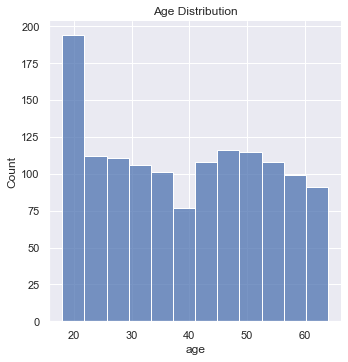

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

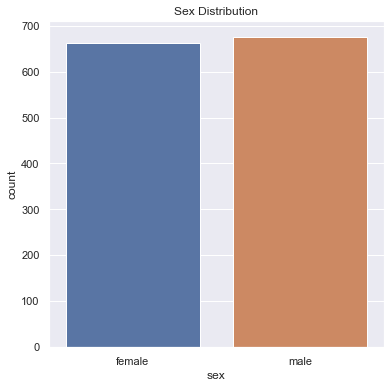

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

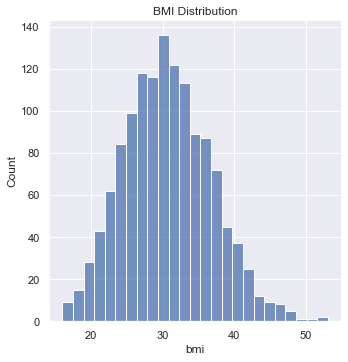

In [12]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

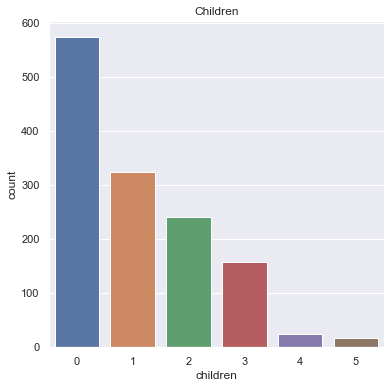

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

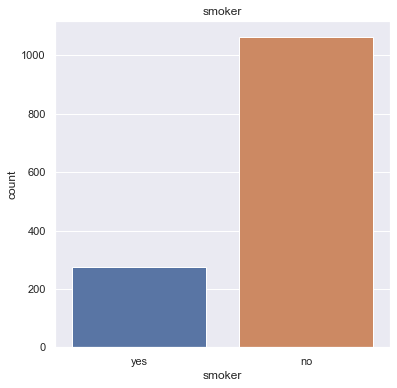

In [15]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

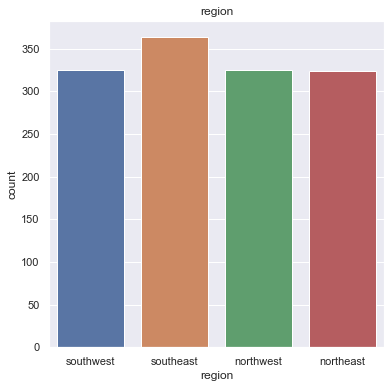

In [17]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

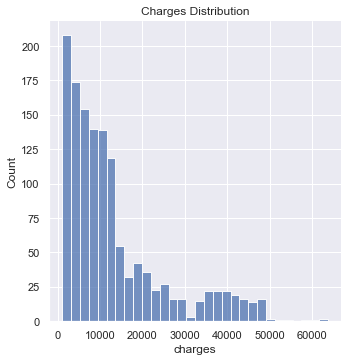

In [19]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

## Encoding the categorical features

## Splitting the data into Training data & Testing Data

In [20]:
insurance_dataset['sex'] = pd.factorize(insurance_dataset['sex'])[0] + 0
insurance_dataset['region'] = pd.factorize(insurance_dataset['region'])[0] + 0
insurance_dataset['smoker'] = pd.factorize(insurance_dataset['smoker'])[0] + 0


In [21]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [22]:
X = insurance_dataset.drop('charges', axis = 1)
test_data = insurance_dataset.drop('charges', axis = 1)
y = insurance_dataset['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2


In [24]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [25]:
import pickle
pickle.dump(scaler,open('m_scaling.pkl','wb'))

In [26]:
def scores(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [28]:
# prediction on Training data
training_data_prediction = Gradient_model.predict(X_train_scaled)

In [29]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9134024649512867


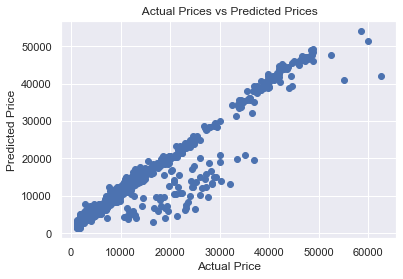

In [30]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.526184e+03
MSE_gradient,2.110072e+07
RMSE_gradient,4.593552e+03


In [32]:
# R squared Error
error_score = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", error_score)

R squared Error :  0.849792542412332


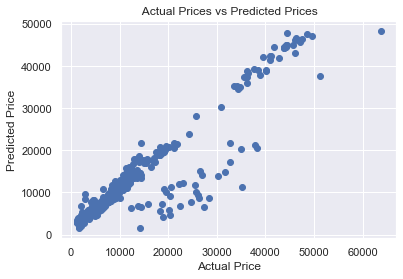

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=15)
print(np.sqrt(scores))

[0.95518391 0.93836374 0.95317244 0.8718056  0.86363548 0.9750012
 0.91214527 0.94538744 0.89011212 0.93378534 0.94775197 0.89181573
 0.95077535 0.87900252 0.91590237]


In [35]:
test_data_prediction = Gradient_model.predict(X_test_scaled)

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, test_data_prediction)

0.849792542412332

In [37]:
input_data = (18,0,36.85,0,1,1)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
final_data = scaler.transform(input_data_reshaped)
prediction = Gradient_model.predict(final_data) 
print(prediction) 

[2313.28705124]
The insurance cost is USD  2313.287051241663


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
import pickle
pickle.dump(Gradient_model,open('m_regmodel.pkl','wb'))

In [39]:
pickled_model=pickle.load(open('m_regmodel.pkl','rb'))

In [40]:
pickled_model.predict(scaler.transform(np.asarray(test_data.iloc[0]).reshape(1,-1)))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([17583.57136354])